In [171]:
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from typing import Dict

import pandas as pd
import requests
import json
import os
from os import listdir


# Importing Data into our DataFrame from Colorado Department of Wildlife

In [307]:
# Uploading bear attacks CSVs from 2019-2021 concating them into one DataFrame
filepaths = [f for f in listdir("C:/Users/Owner/Documents/Colorado_bear") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv,filepaths))
#Dropping all Nan Columns
df.dropna(axis=1, how='all', inplace=True)
#Creating new column district without area 
df['District2'] = df['District'].str.split('-').str[1]
df["Incident Date"] = pd.to_datetime(df['Incident Date'])
df["Timestamp"] = pd.to_datetime(df['Timestamp'])
df["Timestamp"].dt.strftime("%A/%C/%Y")
df['Month'] = df['Timestamp'].dt.month_name().str.slice(stop=3)
df['Year'] = df['Incident Date'].dt.year



In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 16
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Section 1 Header         10356 non-null  object        
 1   Timestamp                10356 non-null  datetime64[ns]
 2   Species                  10356 non-null  object        
 3   RP Header                10356 non-null  object        
 4   Location Header          10356 non-null  object        
 5   GMU                      10356 non-null  int64         
 6   County                   10356 non-null  object        
 7   District                 10356 non-null  object        
 8   Area                     10356 non-null  object        
 9   Region                   10356 non-null  object        
 10  Same Address             9901 non-null   object        
 11  Incident Header          10356 non-null  object        
 12  Incident Date            10356 non-

In [309]:
 df[df['Year'] =='1931']


c:\python38\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,Section 1 Header,Timestamp,Species,RP Header,Location Header,GMU,County,District,Area,Region,...,New Ear Tag Number,New PIT Tag (Dec),New Collar,Release Header,Release Date,Seal #,Photos?,District2,Month,Year


Text(0, 0.5, 'Bear Human Contact')

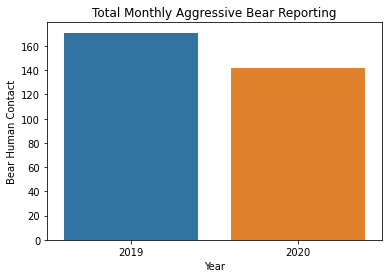

In [321]:
bears_grouped = df[df['Complaint Type'].str.contains('Aggressive')].groupby(["Year"]).count().reset_index()
bears_grouped
sns.barplot(data=bears_grouped, x="Year", y="Species").set(title='Total Monthly Aggressive Bear Reporting')

plt.ylabel("Bear Human Contact")


In [270]:
def Aggressive_Bear(self):
    All_years=df[df['Complaint Type'].str.contains('Aggressive')]
    df_self = All_years.loc[All_years['Year'] == self]
    return df_self
#df.loc[df['column_name'] == some_value]
Aggressive_Bear(2020)

,Section 1 Header,Timestamp,Species,RP Header,Location Header,GMU,County,District,Area,Region,...,New Ear Tag Number,New PIT Tag (Dec),New Collar,Release Header,Release Date,Seal #,Photos?,District2,Month,Year
1,Bear/Lion Incident Report,2020-07-12 12:43:00,Black Bear,Reporting Party,Incident Location,70,San Miguel,382 - Norwood,Area 18,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norwood,Jul,2020
4,Bear/Lion Incident Report,2020-08-28 15:07:00,Black Bear,Reporting Party,Incident Location,20,Boulder,121 - Longmont N,Area 02,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Longmont N,Aug,2020
62,Bear/Lion Incident Report,2020-10-04 16:32:00,Black Bear,Reporting Party,Incident Location,47,Pitkin,462 - Aspen,Area 08,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,N,Aspen,Oct,2020
77,Bear/Lion Incident Report,2020-08-22 17:05:00,Black Bear,Reporting Party,Incident Location,54,Gunnison,344 - Gunnison NW,Area 16,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gunnison NW,Aug,2020
134,Bear/Lion Incident Report,2020-07-09 14:20:00,Black Bear,Reporting Party,Incident Location,84,Custer,223 - Rye,Area 11,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,N,Rye,Jul,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,Bear/Lion Incident Report,2020-06-01 00:21:00,Black Bear,Reporting Party,Incident Location,28,Grand,484 - Hot Sulphur Sprgs,Area 09,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,N,Hot Sulphur Sprgs,Jun,2020
4897,Bear/Lion Incident Report,2020-08-07 08:47:00,Black Bear,Reporting Party,Incident Location,43,Pitkin,462 - Aspen,Area 08,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,N,Aspen,Aug,2020
4920,Bear/Lion Incident Report,2020-08-21 23:00:00,Black Bear,Reporting Party,Incident Location,20,Larimer,124 - Estes Park,Area 02,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,Y,Estes Park,Aug,2020
4921,Bear/Lion Incident Report,2020-11-07 11:52:00,Black Bear,Reporting Party,Incident Location,53,Delta,348 - Hotchkiss,Area 16,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,N,Hotchkiss,Nov,2020


## Monthly Bear Reporting 

Monthly totals for bear sightings, aggresive behavior and break-ins.  We can see that bears interact with humans the most during
the summer. Bear need to eat 10,000 calories a day to have stores for the winter. 

Text(0, 0.5, 'Bear Human Contact')

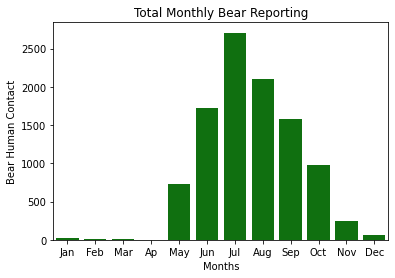

In [311]:

count=df.groupby('Month').count().reset_index()

ax = sns.barplot(x='Month',y='Species', data=count, color='Green', 
                 order=["Jan", "Feb",'Mar','Ap','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Total Monthly Bear Reporting')
plt.xlabel("Months")
plt.ylabel("Bear Human Contact")


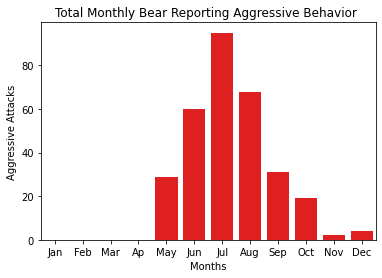

In [312]:

count=df[df['Complaint Type'].str.contains('Aggressive')].groupby('Month').count().reset_index()

ax = sns.barplot(x='Month',y='Species', data=count, color='red', 
                 order=["Jan", "Feb",'Mar','Ap','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Total Monthly Bear Reporting Aggressive Behavior ')
plt.xlabel("Months")
plt.ylabel("Aggressive Attacks"),
count=Aggressive_Bear(2020).groupby('Month').count().reset_index()






In [90]:
for i, row in df.iterrows():
    apiAddress = str(df.at[i, 'County']) #+ str(df.at[i, 'State Code'])

    parameters: Dict[str, str] = {
        #'key': os.environ.get('API_KEY'),
        'location': apiAddress
        }

    response = requests.get('https://api.census.gov/data/2010/dec/sf1?get=NAME&for=county', params=parameters)
    #print(response.text)
    data = json.loads(response.text)['results']
    print(data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [272]:
count=df.groupby('Month').count().reset_index()
count


,Month,Section 1 Header,Timestamp,Species,RP Header,Location Header,GMU,County,District,Area,...,New Ear Tag Color,New Ear Tag Number,New PIT Tag (Dec),New Collar,Release Header,Release Date,Seal #,Photos?,District2,Year
0,Apr,183,183,183,183,183,183,183,183,183,...,1,0,1,1,1,1,9,13,183,183
1,Aug,2108,2108,2108,2108,2108,2108,2108,2108,2108,...,29,27,18,19,22,22,27,454,2108,2108
2,Dec,59,59,59,59,59,59,59,59,59,...,0,0,0,0,0,0,0,10,59,59
3,Feb,11,11,11,11,11,11,11,11,11,...,0,0,0,0,0,0,0,3,11,11
4,Jan,17,17,17,17,17,17,17,17,17,...,3,3,3,3,3,3,0,2,17,17
5,Jul,2707,2707,2707,2707,2707,2707,2707,2707,2707,...,37,31,25,30,34,34,55,559,2707,2707
6,Jun,1718,1718,1718,1718,1718,1718,1718,1718,1718,...,29,22,27,26,29,29,24,248,1718,1718
7,Mar,16,16,16,16,16,16,16,16,16,...,0,0,0,0,0,0,0,0,16,16
8,May,734,734,734,734,734,734,734,734,734,...,15,8,13,14,15,15,14,88,734,734
9,Nov,243,243,243,243,243,243,243,243,243,...,0,0,0,0,0,0,2,19,243,243


Text(0, 0.5, 'Aggressive Attacks')

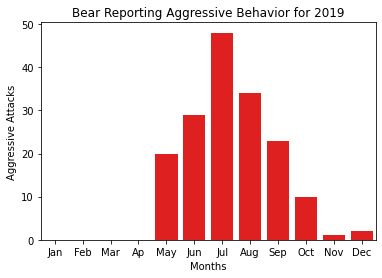

In [83]:

count=df2.groupby('Month').count().reset_index()

ax = sns.barplot(x='Month',y='Species', data=count, color='red', 
                 order=["Jan", "Feb",'Mar','Ap','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).set(title='Bear Reporting Aggressive Behavior for 2019')
plt.xlabel("Months")
plt.ylabel("Aggressive Attacks")


In [33]:
DFT = df2['Complaint Type'] + df2['County']


In [45]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = 'Colorado'
#df_sample[df_sample['STNAME'] == 'California']

values = df2['Complaint Type'].tolist()
#fips = df_sample_r['FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    #fips=fips,
    values=values, scope=['CO'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

TypeError: create_choropleth() missing 1 required positional argument: 'fips'

In [41]:

#df.drop(axis=1)

df['District2']

0               Norwood
1            Estes Park
2              Meeker N
3        Breckenridge E
4           Steamboat S
             ...       
5387            Rifle N
5388           Bayfield
5389          Durango W
5390      Pagosa Spgs E
5391              Aspen
Name: District2, Length: 5392, dtype: object

In [43]:
county_count = df.groupby(df['County']).count()
print(county_count['Section 1 Header'])

County
Alamosa          2
Arapahoe         4
Archuleta      169
Bent             1
Boulder        310
Chaffee         12
Clear Creek     34
Conejos          1
Costilla         6
Custer          27
Delta           40
Dolores         11
Douglas        217
Eagle          112
El Paso        563
Elbert          10
Fremont         54
Garfield       226
Gilpin           9
Grand           87
Gunnison        96
Hinsdale        19
Huerfano        17
Jackson         18
Jefferson      245
La Plata       313
Lake            13
Larimer        378
Las Animas      32
Lincoln          2
Mesa           174
Mineral         23
Moffat          28
Montezuma       16
Montrose        91
Morgan           2
Ouray          165
Park            67
Pitkin         948
Pueblo          11
Rio Blanco     104
Rio Grande       6
Routt          363
Saguache        29
San Miguel     125
Summit          93
Teller         114
Weld             5
Name: Section 1 Header, dtype: int64


In [95]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 16 to 5360
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Section 1 Header         171 non-null    object        
 1   Timestamp                171 non-null    datetime64[ns]
 2   Species                  171 non-null    object        
 3   RP Header                171 non-null    object        
 4   Location Header          171 non-null    object        
 5   GMU                      171 non-null    int64         
 6   County                   171 non-null    object        
 7   District                 171 non-null    object        
 8   Area                     171 non-null    object        
 9   Region                   171 non-null    object        
 10  Same Address             168 non-null    object        
 11  Incident Header          171 non-null    object        
 12  Incident Date            171 non-n

In [140]:

    df[df['Complaint Type'].str.contains('Food Source Property Damage')]
    #eturn df
#df2 = df[df['Complaint Type'].str.contains('Food Source Property Damage')]

,Section 1 Header,Timestamp,Species,RP Header,Location Header,GMU,County,District,Area,Region,...,Capture Method,New Ear Tag Color,New Ear Tag Number,New PIT Tag (Dec),New Collar,Release Header,Release Date,Seal #,Photos?,District2
0,Bear/Lion Incident Report,2019-08-02 05:50:00,Black Bear,Reporting Party,Incident Location,70,San Miguel,382 - Norwood,Area 18,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norwood
1,Bear/Lion Incident Report,2019-11-14 13:57:00,Black Bear,Reporting Party,Incident Location,20,Larimer,124 - Estes Park,Area 02,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estes Park
2,Bear/Lion Incident Report,2019-08-29 16:07:00,Black Bear,Reporting Party,Incident Location,12,Rio Blanco,426 - Meeker N,Area 06,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meeker N
4,Bear/Lion Incident Report,2019-06-28 08:36:00,Black Bear,Reporting Party,Incident Location,131,Routt,493 - Steamboat S,Area 10,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steamboat S
6,Bear/Lion Incident Report,2019-08-05 11:06:00,Black Bear,Reporting Party,Incident Location,118,El Paso,288 - C Spgs SE,Area 14,SE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C Spgs SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5384,Bear/Lion Incident Report,2019-07-29 11:24:00,Black Bear,Reporting Party,Incident Location,43,Pitkin,462 - Aspen,Area 08,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aspen
5386,Bear/Lion Incident Report,2019-09-16 08:11:00,Black Bear,Reporting Party,Incident Location,41,Mesa,445 - Palisade,Area 07,NW,...,Cage Trap,Red,7108.0,2.440000e+15,N,Release Information,9/17/2019,NaN,N,Palisade
5388,Bear/Lion Incident Report,2019-07-05 15:00:00,Black Bear,Reporting Party,Incident Location,751,La Plata,323 - Bayfield,Area 15,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayfield
5389,Bear/Lion Incident Report,2019-10-04 16:27:00,Black Bear,Reporting Party,Incident Location,74,La Plata,326 - Durango W,Area 15,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Durango W


In [166]:
def Food(self):
    return self[self['Complaint Type'].str.contains('Aggressive')]
    
    

In [169]:
df2['State'] = 'Colorado'
df2['State Code'] = 8
df2

,Section 1 Header,Timestamp,Species,RP Header,Location Header,GMU,County,District,Area,Region,...,Capture Method,New Ear Tag Color,New Ear Tag Number,New PIT Tag (Dec),New Collar,Release Header,Release Date,Seal #,Photos?,District2
0,Bear/Lion Incident Report,2019-08-02 05:50:00,Black Bear,Reporting Party,Incident Location,70,San Miguel,382 - Norwood,Area 18,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norwood
1,Bear/Lion Incident Report,2019-11-14 13:57:00,Black Bear,Reporting Party,Incident Location,20,Larimer,124 - Estes Park,Area 02,NE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Estes Park
2,Bear/Lion Incident Report,2019-08-29 16:07:00,Black Bear,Reporting Party,Incident Location,12,Rio Blanco,426 - Meeker N,Area 06,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meeker N
3,Bear/Lion Incident Report,2019-04-30 15:37:00,Black Bear,Reporting Party,Incident Location,37,Summit,488 - Breckenridge E,Area 09,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Breckenridge E
4,Bear/Lion Incident Report,2019-06-28 08:36:00,Black Bear,Reporting Party,Incident Location,131,Routt,493 - Steamboat S,Area 10,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Steamboat S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5387,Bear/Lion Incident Report,2019-05-20 12:18:00,Black Bear,Reporting Party,Incident Location,33,Garfield,443 - Rifle N,Area 07,NW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rifle N
5388,Bear/Lion Incident Report,2019-07-05 15:00:00,Black Bear,Reporting Party,Incident Location,751,La Plata,323 - Bayfield,Area 15,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bayfield
5389,Bear/Lion Incident Report,2019-10-04 16:27:00,Black Bear,Reporting Party,Incident Location,74,La Plata,326 - Durango W,Area 15,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Durango W
5390,Bear/Lion Incident Report,2019-05-01 14:40:00,Black Bear,Reporting Party,Incident Location,78,Archuleta,328 - Pagosa Spgs E,Area 15,SW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagosa Spgs E
